<a href="https://colab.research.google.com/github/valid999/NLP_projects/blob/main/Discover__the_relationship_between_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds



embedding_layer = layers.Embedding(1000 , 5)

result = embedding_layer(tf.constant([1 ,2, 3]))


print(result.numpy())
print(result.numpy().shape)

[[ 0.04183214 -0.02492264 -0.02724497  0.00124935 -0.04265461]
 [ 0.01358293  0.04861346  0.02148873 -0.03601422 -0.01422483]
 [ 0.02032787  0.04683472 -0.04159294  0.00565674 -0.03754724]]
(3, 5)


In [2]:
(train_data , test_data) , info = tfds.load('imdb_reviews/subwords8k' ,
                                             split = (tfds.Split.TRAIN , tfds.Split.TEST) ,
                                            with_info = True , as_supervised = True)

encoder = info.features['text'].encoder
print(encoder.subwords[:20])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteM9TJXB/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteM9TJXB/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteM9TJXB/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


In [3]:
padded_shape = ([None] , ())
train_batches  = train_data.shuffle(1000).padded_batch(10 ,

                                                       padded_shapes = padded_shape)

test_batches  = train_data.shuffle(1000).padded_batch(10 ,
                                                       padded_shapes = padded_shape)

Epoch 1/10
2500/2500 [==============================] - 170s 66ms/step - loss: 0.6372 - accuracy: 0.6898 - val_loss: 0.5201 - val_accuracy: 0.8400
Epoch 2/10
2500/2500 [==============================] - 40s 16ms/step - loss: 0.4655 - accuracy: 0.8360 - val_loss: 0.3843 - val_accuracy: 0.8850
Epoch 3/10
2500/2500 [==============================] - 25s 10ms/step - loss: 0.3637 - accuracy: 0.8758 - val_loss: 0.3191 - val_accuracy: 0.8750
Epoch 4/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.3092 - accuracy: 0.8953 - val_loss: 0.2808 - val_accuracy: 0.9100
Epoch 5/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.2758 - accuracy: 0.9060 - val_loss: 0.2424 - val_accuracy: 0.9150
Epoch 6/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2516 - accuracy: 0.9146 - val_loss: 0.2617 - val_accuracy: 0.9050
Epoch 7/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.2320 - accuracy: 0.9224 - val_loss: 0.2387 - va

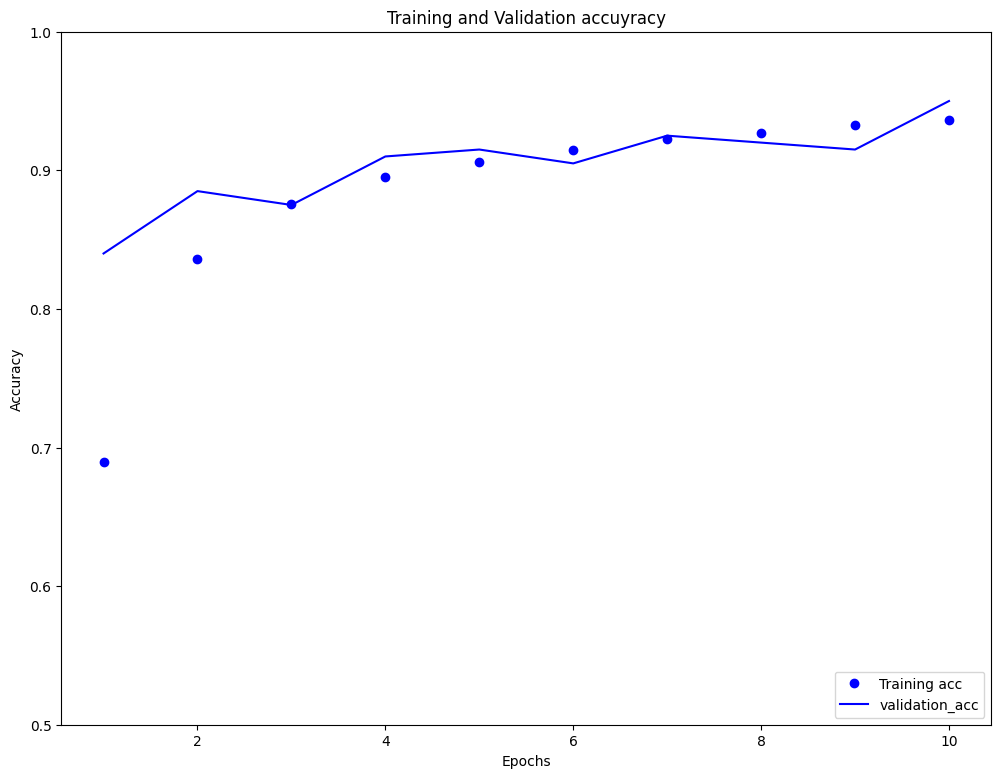

In [4]:
embedding_dim = 16
model = keras.Sequential([
  layers.Embedding(encoder.vocab_size , embedding_dim) ,
  layers.GlobalAveragePooling1D(),
  layers.Dense(1 , activation = 'sigmoid')

])

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy'  ,   # the optimization line
              metrics = ['accuracy'])

history = model.fit(train_batches , epochs = 10 , validation_data = test_batches ,
                    validation_steps = 20)


history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1 , len(acc) + 1)

plt.figure(figsize = (12 , 9))
plt.plot(epochs , acc , 'bo' , label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'validation_acc')
plt.title('Training and Validation accuyracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim((0.5 , 1))
plt.show()

Epoch 1/10
2500/2500 [==============================] - 111s 44ms/step - loss: 0.6339 - accuracy: 0.7056 - val_loss: 0.5433 - val_accuracy: 0.7750
Epoch 2/10
2500/2500 [==============================] - 33s 13ms/step - loss: 0.4626 - accuracy: 0.8385 - val_loss: 0.4342 - val_accuracy: 0.8750
Epoch 3/10
2500/2500 [==============================] - 24s 9ms/step - loss: 0.3603 - accuracy: 0.8784 - val_loss: 0.4026 - val_accuracy: 0.8600
Epoch 4/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.3077 - accuracy: 0.8956 - val_loss: 0.3845 - val_accuracy: 0.8400
Epoch 5/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.2740 - accuracy: 0.9071 - val_loss: 0.2042 - val_accuracy: 0.9250
Epoch 6/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.2488 - accuracy: 0.9158 - val_loss: 0.3448 - val_accuracy: 0.8600
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2321 - accuracy: 0.9228 - val_loss: 0.2826 - val

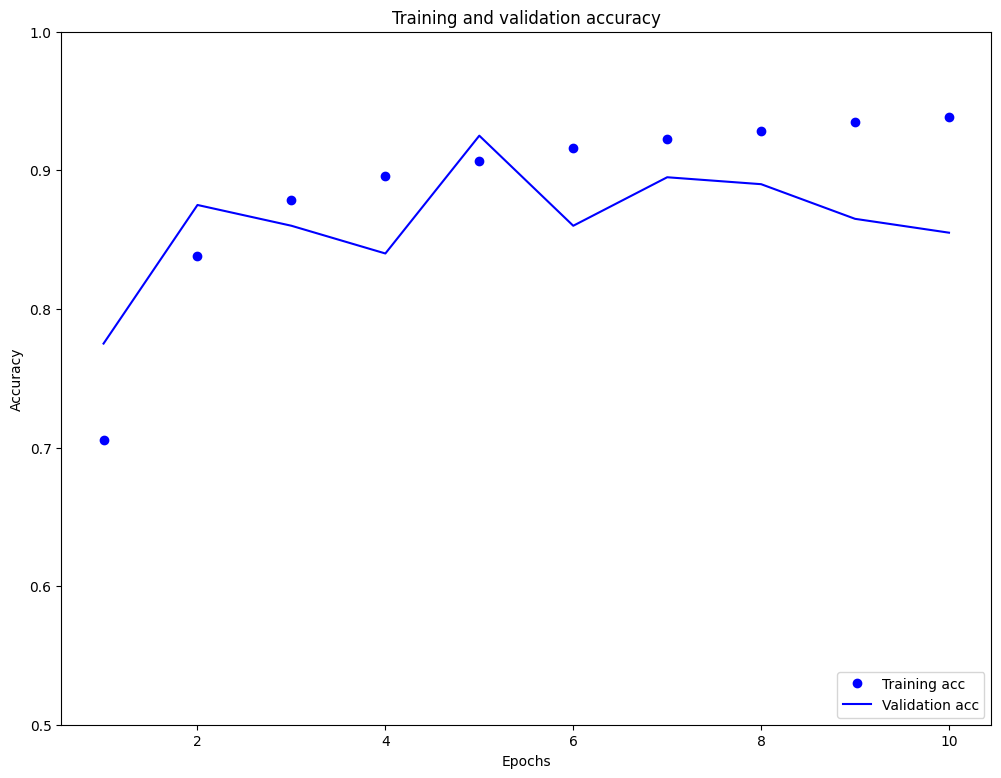

In [5]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

#embedding_layer = layers.Embedding(1000, 5)

#result = embedding_layer(tf.constant([1,2,3]))

#print(result.numpy())
#print(result.numpy().shape)
def get_batch_data():
    (train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                    split=(tfds.Split.TRAIN, tfds.Split.TEST),
                                    with_info=True, as_supervised=True)

    encoder = info.features['text'].encoder
    #print(encoder.subwords[:20])
    padded_shapes = ([None], ())
    train_batches = train_data.shuffle(1000).padded_batch(10,
                                                padded_shapes=padded_shapes)
    test_batches = test_data.shuffle(1000).padded_batch(10,
                                                padded_shapes=padded_shapes)
    return train_batches, test_batches, encoder

def get_model(encoder, embedding_dim=16):

    model = keras.Sequential([
                    layers.Embedding(encoder.vocab_size, embedding_dim),
                    layers.GlobalAveragePooling1D(),
                    layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_history(history):
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12,9))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim((0.5, 1))
    plt.show()

def retrieve_embeddings(model, encoder):
    out_vectors = io.open('vecs.tsv', 'w', encoding='utf-8')
    out_metadata = io.open('meta.tsv', 'w', encoding='utf-8')
    weights = model.layers[0].get_weights()[0]

    for num, word in enumerate(encoder.subwords):
        vec = weights[num+1]
        out_metadata.write(word + '\n')
        out_vectors.write('\t'.join([str(x) for x in vec]) + '\n')
    out_vectors.close()
    out_metadata.close()

train_batches, test_batches, encoder = get_batch_data()
model = get_model(encoder)
history = model.fit(train_batches, epochs=10, validation_data=test_batches,
                    validation_steps=20)
plot_history(history)
retrieve_embeddings(model, encoder)